In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Libreta para analizar la energ'ia solar m'axima en un d'ia y graficarla 

* identifique el d'ia con mayor energ'ia solar Ig, graficarlo, guardarlo y regrese   el d'ia
<!-- * Compara dos d'ias de radiaci'on solar, por default con el d'ia con mayor energ'ia solar  -->
* Grafica temperatura y humedad relatica de un d'ia espec'ifico y guardarla con el nombre del d'ia

In [2]:
def find_Emax(df):
    ''' Funcion que encuentra el dia con mayor energia solar, lo grafica
    input: Dataframe que contenga Ig
    output: Timestamp '''
    df['E'] = df.Ig.resample('D').sum()*(1/6)
    diaEmax= df.E.idxmax()
    print('El dia con mayor energia solar es:',diaEmax )
    fig, ax = plt.subplots(figsize=(10,3))
    fecha = diaEmax.strftime('%Y-%m-%d')
    ax.plot(df.Ig.loc[fecha])

    ax.set_xlabel('Tiempo [mm-dd HH]')
    ax.set_ylabel('Ig [$W/m^2$]')
    nombre = diaEmax.strftime('%Y-%m-%d').replace('-','') + '_Ig.pdf'
    archivo = '../../img/' + nombre
    plt.tight_layout()
    plt.savefig(archivo)
    return diaEmax

def graph_ToHR(To,HR,ruta,dia):
    ''' Grafica Temperatura y Humedad Relativa de un dia especifico 
    con formato YYMMDD_ToHR.png

    Parametros
    ----------
    To   : Serie temporal que contiene la temperatura exterior
    HR   : Serie temporal que contiene la humedad relativa
    ruta : ruta al directorio a guardar la imagen
    dia  : str de fecha con formato YYYY-MM-DD
    '''
    fig, ax = plt.subplots(2,figsize=(10,4),sharex=True)

    ax[0].scatter(To.loc[dia].index,To.loc[dia],color='g')
    ax[1].scatter(HR.loc[dia].index,HR.loc[dia],color='r')

    ax[0].set_ylabel('T [$^oC$]')
    ax[1].set_ylabel('HR [\%]')

    ax[1].set_ylim(0,100)

    ax[0].grid()
    ax[1].grid()

    ax[1].set_xlabel('Tiempo [mm-dd hh]')

    nombre = dia.replace('-','') + '_ToHR.png'
    archivo = ruta + nombre
    plt.savefig(archivo)

In [3]:
file = '../../data/temixco.csv'
df = pd.read_csv(file,index_col=0,parse_dates=True)

In [9]:
marzo = df.loc['2018-03']
abril = df.loc['2018-04']

El dia con mayor energia solar es: 2018-06-27 00:00:00


Timestamp('2018-06-27 00:00:00')

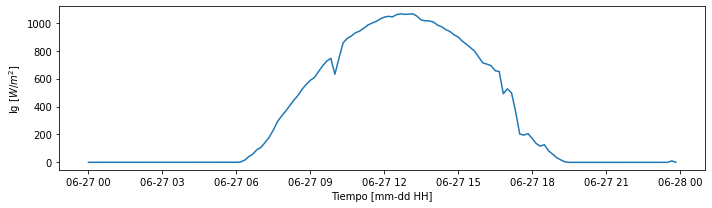

In [12]:
find_Emax(df)

El dia con mayor energia solar es: 2018-03-29 00:00:00


Timestamp('2018-03-29 00:00:00')

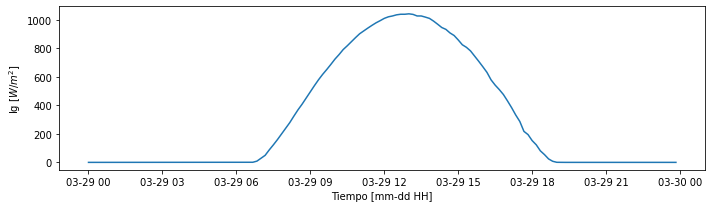

In [10]:
find_Emax(marzo)

El dia con mayor energia solar es: 2018-04-14 00:00:00


Timestamp('2018-04-14 00:00:00')

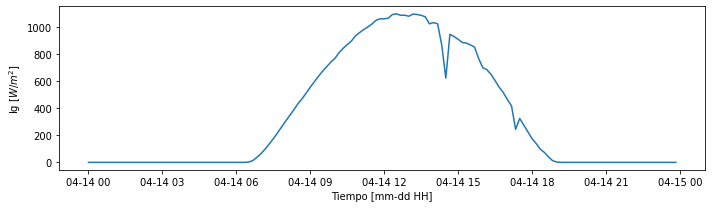

In [11]:
find_Emax(abril)

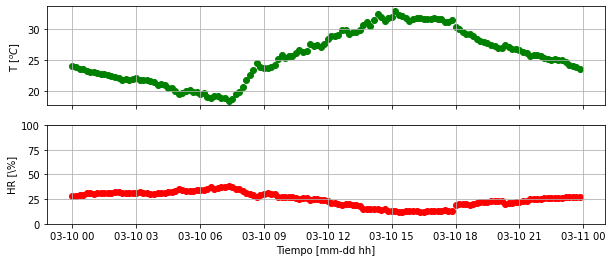

In [5]:
graph_ToHR(df.To,df.RH,'../../img','2018-03-10')

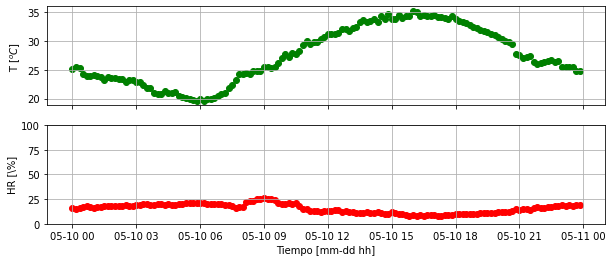

In [6]:
graph_ToHR(df.To,df.RH,'../../img','2018-05-10')  # discrepancia en rangos